# Capstone II: Craiglist Used Car Dataset
### Part 1: Data Wrangling

Biman Mondal\
Feb. 19, 2025

The ultimate of this project is to create a model to predict the price of a given vehicle using the other features in the dataset.\
The raw dataset (.csv file) is sourced from Kaggle:\
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [76]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns
# Import missingno package
import missingno as msno
# Import datetime
import datetime as dt
# Import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
# Import data from local .csv file
# chunk_size = 1000 # 
vehicle_raw = pd.read_csv('./data/vehicles.csv')

### 0. View raw data

In [78]:
vehicle_raw.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN


In [79]:
raw_rows_cols = vehicle_raw.shape
print(f"\nThere are {raw_rows_cols[0]} rows and {raw_rows_cols[1]} columns in the dataset.")


There are 426880 rows and 26 columns in the dataset.


In [80]:
# Get the data information
vehicle_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Look at the null values by dataframe columns.
Plot the number of missing values in the dataframe.

              missing_count
id                        0
url                       0
region                    0
region_url                0
price                     0
year                   1205
manufacturer          17646
model                  5277
condition            174104
cylinders            177678
fuel                   3013
odometer               4400
title_status           8242
transmission           2556
VIN                  161042
drive                130567
size                 306361
type                  92858
paint_color          130203
image_url                68
description              70
county               426880
state                     0
lat                    6549
long                   6549
posting_date             68


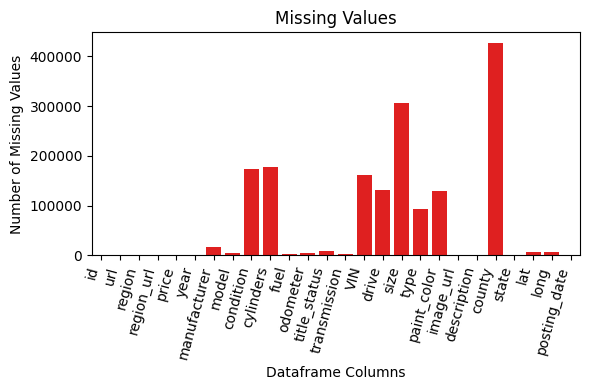

In [81]:
myfilter = pd.DataFrame(vehicle_raw.isnull().sum(),columns=['missing_count'])
print(myfilter)

# Calculate the number of missing values in each column
myfilter = pd.DataFrame(vehicle_raw.isnull().sum(), columns=['missing_count'])

# Create a bar plot using seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=myfilter.index, y='missing_count', data=myfilter, color='red')

# Rotate x-axis labels and align them properly
plt.xticks(rotation=75, ha='right')

# Add labels and title
plt.title('Missing Values')
plt.xlabel('Dataframe Columns')
plt.ylabel('Number of Missing Values')

# Improve layout and display the plot
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

Many columns have incomplete data and the county column is missing all data. 

In [82]:
# Convert data to datetime
#print(type(vehicle_raw['posting_date']))
vehicle_raw['posting_date'] = pd.to_datetime(vehicle_raw['posting_date'],errors='coerce')
                                            
#vehicle_raw.loc[10:20,'posting_date']
# Empty posting_dates are filled with "NaT" - "Not a time"

In [83]:
dates = pd.Series(vehicle_raw["posting_date"].dropna())

print('Max:', dates.max())
print('Min:', dates.min())

# Looks like most of the posts were scraped from Craigslist from April and May of 2021

Max: 2021-05-04 23:24:09-05:00
Min: 2021-04-04 03:00:25-04:00


### 1.1 Convert Columns to Category Type

In [84]:
# Convert the posting_date column to datetime
# Change fuel tye, manufacturer, model, condition, cylinders
# Find data that doesn't have any description, year, manufacturer, and model and remove the data from the set

In [85]:
# There are nearly 30k unique models in this dataset
print('Manufacturers:',vehicle_raw["manufacturer"].nunique(), 'Models:',vehicle_raw['model'].nunique())
#print(vehicle_raw["model"].tail(10))

Manufacturers: 42 Models: 29667


In [86]:
vehicle_raw["manufacturer"].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [87]:
print('Condition:', vehicle_raw["condition"].unique())
print('Engine Size:', vehicle_raw["cylinders"].unique())
print('Fuel:',vehicle_raw["fuel"].unique())
print('Type:', vehicle_raw["type"].unique())
print('Size:', vehicle_raw["size"].unique())
print('Title Status', vehicle_raw["title_status"].unique())
print('Transmission', vehicle_raw["transmission"].unique())
print('Drive', vehicle_raw["drive"].unique())

Condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
Engine Size: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
Fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
Type: [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
Size: [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
Title Status [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
Transmission [nan 'other' 'automatic' 'manual']
Drive [nan 'rwd' '4wd' 'fwd']


In [88]:
# Drop harley-davidson rows since it is a motorcycle manufacturer
# Also no need to include Morgan as it's a older model
find_harley_morgan = (vehicle_raw["manufacturer"] == 'harley-davidson') | (vehicle_raw['manufacturer']== 'morgan')
find_harley = vehicle_raw.loc[find_harley_morgan, 'manufacturer']
#print(f'There are {find_harley.count()} Harley-Davidson/Morgan vehicle counts')
#vehicle_raw.drop(find_harley_morgan,inplace=True)
vehicle_raw.drop(find_harley.index,inplace=True)

In [89]:
# Drop all bus types to simplify dataset
#vehicle_raw.loc[vehicle_raw["type"]=="bus",["price","manufacturer","model"]]
vehicle_raw.drop(vehicle_raw[vehicle_raw["type"]=="bus"].index,inplace=True)
vehicle_raw.drop(vehicle_raw[vehicle_raw["type"].isna()].index,inplace=True)

# Drop all salvage rows
vehicle_raw.drop(vehicle_raw[vehicle_raw["condition"]=="salvage"].index,inplace=True)
vehicle_raw.drop(vehicle_raw[vehicle_raw["title_status"]=="salvage"].index,inplace=True)

# Drop all vehicles that are for parts
vehicle_raw.drop(vehicle_raw[vehicle_raw["title_status"]=="parts only"].index,inplace=True)


In [90]:
# Convert the following columns to category
# Select all columns which have finite set of values
list_of_columns = ["manufacturer","condition","cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "state"]
vehicle_raw[list_of_columns] = vehicle_raw[list_of_columns].astype('category')
vehicle_raw['county'] = vehicle_raw['county'].astype('category')

### 1.2 Drop all Empty Year Column

In [91]:
# Without diving into the description it would be difficult to predict the year of the vehicle
print(vehicle_raw["year"].describe())
#print(np.isinf(vehicle_raw["year"]).sum())
no_year = vehicle_raw[vehicle_raw["year"].isna()]
print('Number of no-year rows: ', no_year.count().sum())

count    329570.000000
mean       2012.012280
std           8.512751
min        1900.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64
Number of no-year rows:  20655


In [92]:
# Drop all null values
# vehicle_raw["year"].dropna(inplace=True,axis=0)
vehicle_raw.drop(no_year.index,inplace=True)
print(vehicle_raw["year"].isna().sum())

0


In [93]:
vehicle_raw['year'] = vehicle_raw['year'].astype('int')

### 1.3 Remove rows with nonsensical high price or near zero price

Lots of mischaracterized high car prices over 350k. These will be dropped from the dataframe.

In [94]:
# Price cutoff
high_price = vehicle_raw['price']>350000
high_price_vehicles = vehicle_raw.loc[high_price,['manufacturer','model','year','price']]
print(f"There are {high_price_vehicles.count().sum()} cars over ${int(350000/1000)}k.")
print(high_price_vehicles.head())

There are 93 cars over $350k.
         manufacturer                        model  year       price
29386            ford       f350 super duty lariat  1999  1111111111
68935          saturn      l-series l200 4dr sedan  2002     2000000
95119   mercedes-benz                     amg g 63  2017      990000
105843          dodge                      journey  2014     6995495
106361            NaN  Lambo Aventador SV Roadster  2016      516999


In [95]:
low_price = vehicle_raw["price"]<500
low_price_vehicles = vehicle_raw.loc[low_price,['manufacturer','model','year','price']]
print(f"There are {low_price.sum()} cars under $500.")
print(low_price_vehicles.head())


There are 32351 cars under $500.
    manufacturer              model  year  price
46          jeep            compass  2011      0
126    chevrolet  express cargo van  2018      0
127    chevrolet  express cargo van  2019      0
128    chevrolet  express cargo van  2018      0
191       nissan             sentra  2015      0


In [96]:
print(f"Original row count: {len(vehicle_raw['price'])}")
price_filter = (high_price | low_price)
drop_price_rows = vehicle_raw.loc[price_filter,"price"]
print(drop_price_rows.count())
vehicle_raw.drop(drop_price_rows.index,inplace=True)
print(f"Row count after dropping rows: {len(vehicle_raw['price'])}")

Original row count: 329570
32377
Row count after dropping rows: 297193


In [97]:
# vehicle_raw["posting_date"].describe()
vehicle_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297193 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            297193 non-null  int64   
 1   url           297193 non-null  object  
 2   region        297193 non-null  object  
 3   region_url    297193 non-null  object  
 4   price         297193 non-null  int64   
 5   year          297193 non-null  int32   
 6   manufacturer  288113 non-null  category
 7   model         294787 non-null  object  
 8   condition     205677 non-null  category
 9   cylinders     198101 non-null  category
 10  fuel          295517 non-null  category
 11  odometer      295540 non-null  float64 
 12  title_status  291130 non-null  category
 13  transmission  295718 non-null  category
 14  VIN           209612 non-null  object  
 15  drive         234737 non-null  category
 16  size          103102 non-null  category
 17  type          297193 non-null  ca

### 2. Plot missing data in data frame

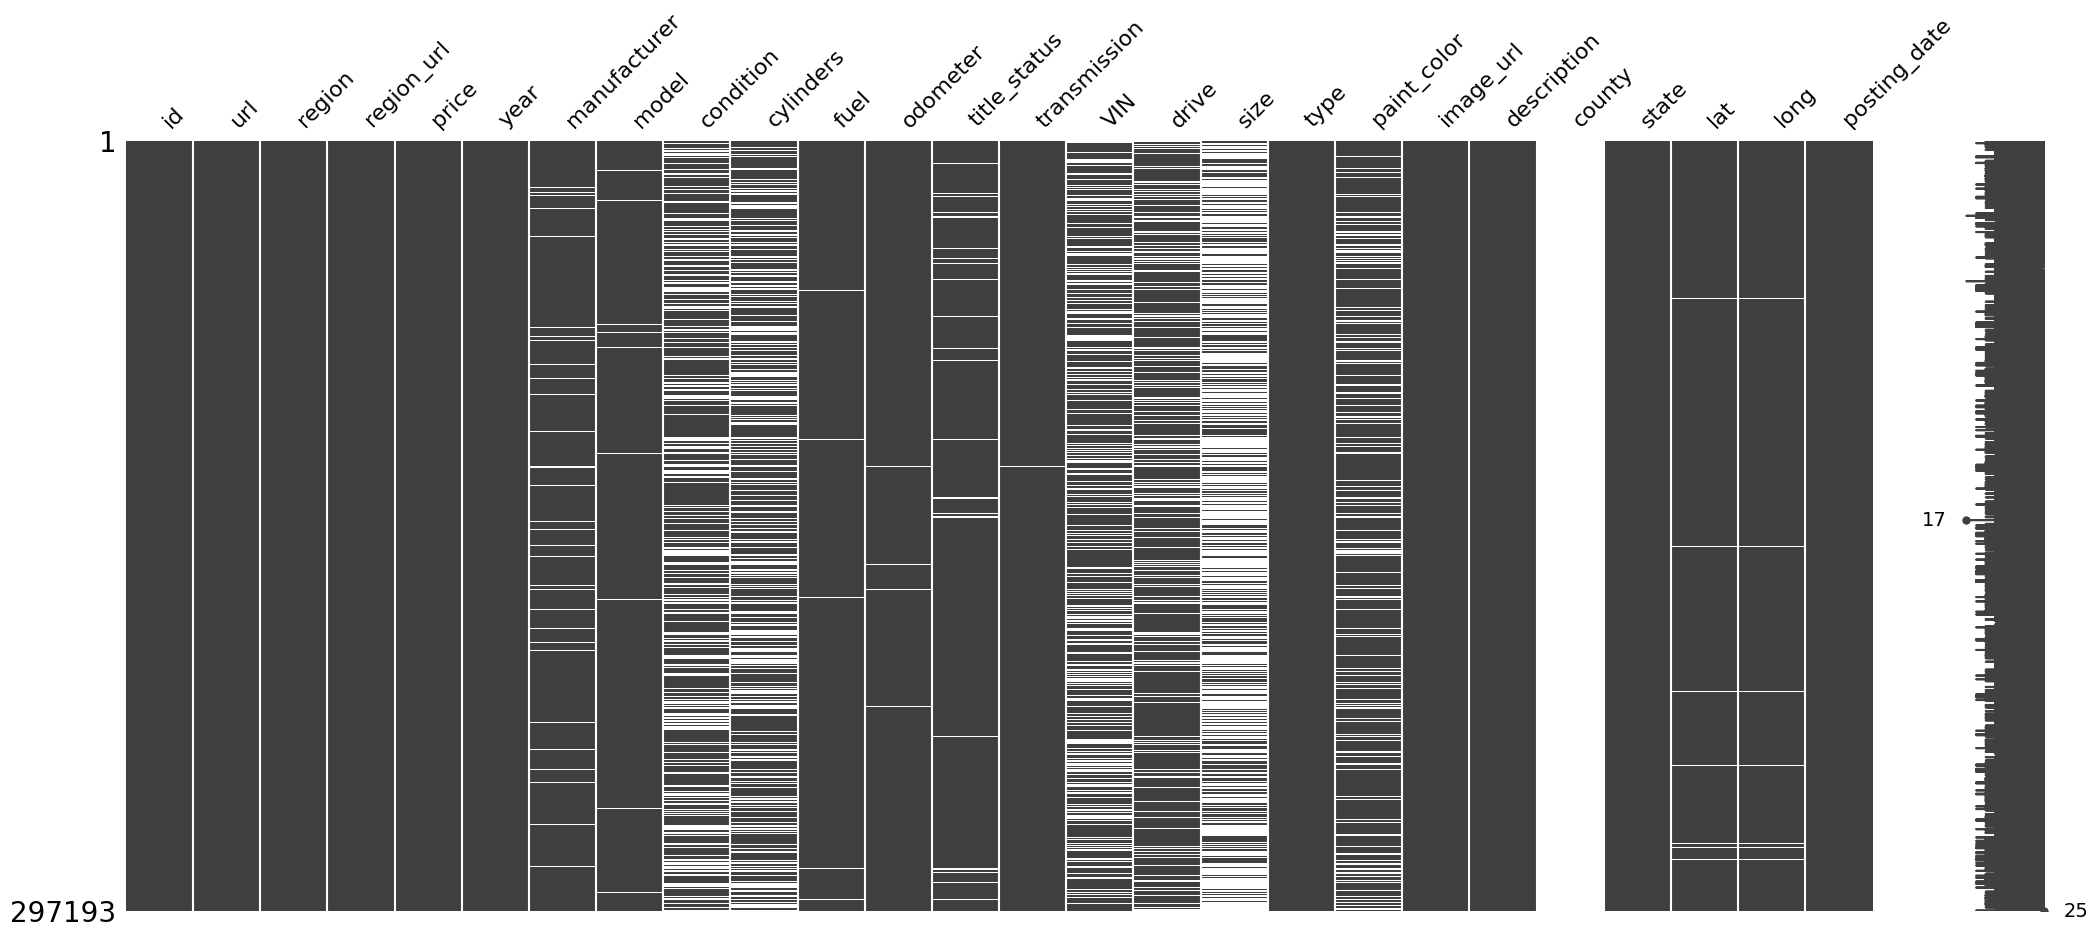

In [98]:
# Plot a matrix of missing rows in the dataset
msno.matrix(vehicle_raw)
plt.show()

In [99]:
row_col_count = vehicle_raw.shape
print(f"\nThere are {row_col_count[0]} rows and {row_col_count[1]} columns in the dataset.")


There are 297193 rows and 26 columns in the dataset.


### 3. Fill Missing Lat/Long Values

Use region/state to fill in the missing lat/long values.

In [100]:
# Identify all the uniquely empty fields in latitude and longitude 
filter_missing_lat = vehicle_raw['long'].isnull()
# Find the associated region and state and create a dataframe
regions_state_missing_lat = vehicle_raw.loc[filter_missing_lat,['region','state','lat','long']]
# Create a dataset with unique empty lat/long combinations
regions_state_missing_lat = regions_state_missing_lat.drop_duplicates()
print(regions_state_missing_lat.head(10))
# Print statement
print(f'\n\nThere are {regions_state_missing_lat.shape[0]} unique missing values in the lat/long columns.')

                     region state  lat  long
304              birmingham    al  NaN   NaN
2380       gadsden-anniston    al  NaN   NaN
3046   huntsville / decatur    al  NaN   NaN
3804                 mobile    al  NaN   NaN
5158     anchorage / mat-su    ak  NaN   NaN
8946     flagstaff / sedona    az  NaN   NaN
9344          mohave county    az  NaN   NaN
10960               phoenix    az  NaN   NaN
17544          fayetteville    ar  NaN   NaN
19212           little rock    ar  NaN   NaN


There are 156 unique missing values in the lat/long columns.


In [101]:
# Create a function that looks up the value of the latitude/longitude from master dataset rows with complete values of the same region/state combination
# Supply the raw data frame and the region and state of 
def fill_lat_long(df,region,state):
    # Filter data so that the region and state match and that the latitude is null
    myfilter = (df['region']== region) & (df['state']== state) & (~df['lat'].isnull())
    # Find the data in the data in the full dataframe
    valid_lat_lon = df.loc[myfilter,['region','state','lat','long']]
    
    # Calculate the median of the values to replace the lat/lon
    median_lat = valid_lat_lon['lat'].median()
    median_long = valid_lat_lon['long'].median()
    return pd.Series([median_lat, median_long])


In [102]:
# Replace the empy lat/long values from the data 
regions_state_missing_lat[['lat','long']]=regions_state_missing_lat.apply(lambda row: fill_lat_long(vehicle_raw.copy(),row.region,row.state),axis=1)
# All missing latitude/longitude in the missing dataframe have been replaced
print('Number of missing lat/long values: ', regions_state_missing_lat['long'].isnull().sum())

Number of missing lat/long values:  0


This step is unnecessary. It is for demonstration of imputing missing lattitude and longitude values. 

### 4. Save Data to File

In [104]:
### 5. Create a new dataframe by randomly halving the data 
#numrows,_ = vehicle_raw.shape
#print(f"Current dataset has: {numrows} rows")
#rand_rows = np.random.randint(numrows, size=numrows)
#vehicle_raw.index[rand_rows]
#vehicle_df = vehicle_raw.drop(vehicle_raw.index[rand_rows])
#num_rows,_ = vehicle_df.shape
raw_rows_cols = vehicle_raw.shape
print(f"\nThere are {raw_rows_cols[0]} rows and {raw_rows_cols[1]} columns in the dataset.")


(297193, 26)


In [105]:
# Write the subset of the data to .csv file
vehicle_raw.to_csv('./data/step1_wrangled_vehicles.csv')

### 5. Summary
The dataset of used vehicles has been investigated in this notebook. This a large 21 column dataset with also a large number of missing values. In order to expedite the data tidying process, certain features deemed unimportant have been dropped. The datatypes have been appropriately assigned. Null data has been removed in three columns but there are still more missing/incorrect values. One major issue with the dataset is that model names are not all correctly standardized (F-150 vs. 150). 
